<a href="https://colab.research.google.com/github/ulubeykhuja/Amaliyot/blob/main/11_MA%CA%BCLUMOTLARNI_TAYYORLASH_11_28_YAKUNIY_AMALIY_VAZIFA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#11-modul. Maʼlumotlarga ishlov berish. Maʼlumotlarni tayyorlash
# 11.28. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifalarni bajargach, maʼlumotlarni yuklash, tozalash, oʻzgartirish, matnlarni normalizatsiya qilish, qiymatlarni tekshirish, guruhlash va tahlil qilish kabi maʼlumotlarga ishlov berish (data processing) koʻnikmalarini egallaysiz.**

#**Umumiy maʼlumotlar bilan ishlash**

#Dataset haqida qisqacha maʼlumot
Restoran savdosi boʻyicha maʼlumotlar toʻplami 17 534 tranzaksiya uchun maʼlumotlarni oʻz ichiga oladi. Maʼlumotlar yetishmayotgan yoki baʼzilari toʻliq kiritilmagan boʻlishi mumkin. Maʼlumotlar toʻplamida asosiy taomlar, shirinliklar, ichimliklar kabi bir nechta toifadagi savdo tafsilotlari mavjud.


 0.   **Unnamed 0** – indekslarni;
 1.   **Order ID** – buyurtma IDʼsini;
 2.   **Customer ID** – mijoz IDʼsini;
 3.   **Category** – mahsulotlar kategoriyasini;
 4.   **Item** – mahsulot nomini;
 5.   **Price** – mahsulotning narxini;
 6.   **Quantity** – qancha mahsulot sotilgani miqdorini;
 7.   **Order Total** – umumiy narx qancha ekanini;
 8.   **Order Date** – buyurtma berilgan sanani (vaqt);
 9.   **Payment Method** – toʻlov usuli turini saqlaydi.

#1) Quyida berilgan datasetni yuklab olib, ustun nomlarini koʻring va ularni maʼno jihatdan tushunarli shaklga keltiring. `Unnamed: 0` ustunini tashlab yuboring!

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/restaurant_sales.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,0,ORD_705844,CUST_092,NaN,side salad#?,3.0,1.0,3.0,2023-12-21,Credit Card
1,1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,3,ORD_630508,CUST_075,Drinks,NaN,-1.0,2.0,5.0,2022-08-09,Credit Card
4,4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [ ]:
#javobni shu yerda yozing
#Unnamed: 0 ustunini tashlab yuboring
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

print("Ustun nomlari:")
print(df.columns.tolist())

#ustun nomlarini koʻring va ularni maʼno jihatdan tushunarli shaklga keltiring.
df.columns = [
    'order_id',
    'customer_id',
    'category_name',
    'item_name',
    'price',
    'quantity',
    'order_total',
    'order_date',
    'payment_method'
]

#tekshirish
print("\nYangi ustun nomlari:")
print(df.columns.tolist())
print()
df.head()

Ustun nomlari:
['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity', 'Order Total', 'Order Date', 'Payment Method']

Yangi ustun nomlari:
['order_id', 'customer_id', 'category_name', 'item_name', 'price', 'quantity', 'order_total', 'order_date', 'payment_method']



,order_id,customer_id,category_name,item_name,price,quantity,order_total,order_date,payment_method
0,ORD_705844,CUST_092,NaN,side salad#?,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,-1.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


#2) Maʼlumotlarning umumiy holatini (info(), describe()) tekshiring.

In [ ]:
#javobni shu yerda yozing
#umumiy ma'lumot
print("=== Umumiy ma'lumotlar ===")
df.info()

print("\n=== Statistik tahlili ===")
print(df.describe())

=== Umumiy ma'lumotlar ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        17534 non-null  object 
 1   customer_id     17534 non-null  object 
 2   category_name   17498 non-null  object 
 3   item_name       15776 non-null  object 
 4   price           17534 non-null  float64
 5   quantity        17104 non-null  float64
 6   order_total     17104 non-null  float64
 7   order_date      17534 non-null  object 
 8   payment_method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB

=== Statistik tahlili ===
              price      quantity   order_total
count  17534.000000  17104.000000  17104.000000
mean       6.207312      3.014149     19.914494
std        4.993782      1.414598     18.732549
min       -1.000000      1.000000      1.000000
25%        3.000000      2.000000      7.500000
50%

#3) Har bir ustundagi boʻsh qiymatlarni aniqlang va ularni toʻldirish strategiyasini ishlab chiqing.

In [ ]:
#javobni shu yerda yozing
print("Bo'sh qiymatlar (boshlanishda):")
print(df.isnull().sum())

#df[pd.isna(df['category_name'])]
#df['item_name'].value_counts()

# # toʻldirish strategiyasini ishlab chiqing.
# df = df.dropna(subset=['category_name'])
# df['item_name'] = df['item_name'].fillna('Unknown')
# df['payment_method'] = df['payment_method'].fillna(df['payment_method'].mode()[0])  # mode bilan to‘ldirish

# # Sonli ustunlar uchun
# df['quantity'] = df['quantity'].fillna(df['quantity'].median())

# # order_total (total) ni hisoblash orqali to‘ldirish
# df['order_total'] = df['order_total'].fillna(df['price'] * df['quantity'])

#item_name bo'sh bo'lgan qatorlarni aniqlash
missing_item = df['item_name'].isnull()
print(f"item_name bo'sh: {missing_item.sum()}")

#item_name ni to'ldirish: price + order_id bo'yicha
missing_item = df['item_name'].isnull()

# price eng ko'p uchraydigan item_name
valid_data = df.dropna(subset=['item_name', 'price'])
price_to_item = valid_data.groupby('price')['item_name'] \
                  .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown Item') \
                  .to_dict()

df.loc[missing_item, 'item_name'] = df.loc[missing_item, 'price'].map(price_to_item)
still_missing = df['item_name'].isnull()
df.loc[still_missing, 'item_name'] = "Item_" + df.loc[still_missing, 'price'].astype(str)


# category_name ni to'ldirish
# Har bir item_name uchun eng ko'p uchraydigan category_name
item_to_cat = df.dropna(subset=['item_name', 'category_name']) \
                .groupby('item_name')['category_name'] \
                .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Other') \
                .to_dict()

# To'ldirish
df['category_name'] = df['category_name'].fillna(df['item_name'].map(item_to_cat)).fillna('Other')


# quantity va order_total
df['quantity'] = df['quantity'].fillna(df['quantity'].median()).astype(int)
df['order_total'] = df['order_total'].fillna(df['price'] * df['quantity'])


# payment_method
df['payment_method'] = df['payment_method'].fillna(df['payment_method'].mode()[0])

# tekshiruv

print("Bo'sh qiymatlar:")
print(df.isnull().sum())
print(f"\nJami qatorlar: {len(df)}  100% saqlangan")

# # Yakuniy natijani tekshirish
# print("=== Yakuniy natij ===")
# print(df.isnull().sum())

Bo'sh qiymatlar (boshlanishda):
order_id             0
customer_id          0
category_name       36
item_name         1758
price                0
quantity           430
order_total        430
order_date           0
payment_method    1082
dtype: int64
item_name bo'sh: 1758
Bo'sh qiymatlar:
order_id          0
customer_id       0
category_name     0
item_name         0
price             0
quantity          0
order_total       0
order_date        0
payment_method    0
dtype: int64

Jami qatorlar: 17534  100% saqlangan


#4) Har bir ustundagi takroriy qiymatlarni toping va ularga qanday oʻzgartirish kiritish kerakligini hal qiling.

In [ ]:
#javobni shu yerda yozing
# Har bir ustundagi takroriy qiymatlarni aniqlash
duplicates = {
    'order_id': df['order_id'].duplicated().sum(),
    'customer_id': df['customer_id'].duplicated().sum(),
    'category_name': df['category_name'].duplicated().sum(),
    'item_name': df['item_name'].duplicated().sum(),
    'price': df['price'].duplicated().sum(),
    'quantity': df['quantity'].duplicated().sum(),
    'order_total': df['order_total'].duplicated().sum(),
    'order_date': df['order_date'].duplicated().sum(),
    'payment_method': df['payment_method'].duplicated().sum()
}

print("Takroriy qiymatlar soni:")
for col, count in duplicates.items():
    print(f"  {col}: {count}")

# order_id — noyob bo'lishi kerak - takrorlarni o'chirish
df = df.drop_duplicates(subset=['order_id'], keep='first')

# item_name — katta harf va bo'shliqlarni tozalash
df['item_name'] = df['item_name'].str.strip().str.title()

# category_name - formatlash
df['category_name'] = df['category_name'].str.strip().str.title()

# payment_method nomlash
payment_corrections = {
    'cash': 'Cash', 'CASH': 'Cash',
    'card': 'Card', 'CARD': 'Card',
    'mobile': 'Mobile Payment', 'MOBILE': 'Mobile Payment'
}
df['payment_method'] = df['payment_method'].replace(payment_corrections)

# natija
print(f"\nTozalangandan keyin qatorlar: {len(df)}")
print("Namuna:")
print(df[['order_id', 'item_name', 'category_name', 'payment_method']].head())

Takroriy qiymatlar soni:
  order_id: 0
  customer_id: 17434
  category_name: 17528
  item_name: 17357
  price: 17519
  quantity: 17529
  order_total: 17492
  order_date: 16804
  payment_method: 17531

Tozalangandan keyin qatorlar: 17534
Namuna:
     order_id        item_name category_name  payment_method
0  ORD_705844     Side Salad#?         Other     Credit Card
1  ORD_338528  Mashed Potatoes   Side Dishes  Digital Wallet
2  ORD_443849  Grilled Chicken   Main Dishes     Credit Card
3  ORD_630508        Item_-1.0        Drinks     Credit Card
4  ORD_648269    Pasta Alfredo   Main Dishes            Cash


#5) Maʼlumotlar toʻplamidagi noto‘g‘ri maʼlumotlar (masalan, son turishi kerak bo‘lgan ustunda matn bo‘lsa) mavjudligini tekshiring va to‘g‘rilang.

In [ ]:
#javobni shu yerda yozing

#malumotlar turi
print(df.dtypes)

numeric_cols = ['price', 'quantity', 'order_total']

print()
print("------------------------------------")

for col in numeric_cols:
    # son bo'lmagan (matnli yoki belgili) qiymatlarni aniqlash
    invalid_rows = df[~df[col].astype(str).str.replace('.', '', regex=False).str.replace('-', '', regex=False).str.isnumeric()]
    if len(invalid_rows) > 0:
        print(f"\n{col} ustunida {len(invalid_rows)} ta noto‘g‘ri qiymat mavjud:")
        print(invalid_rows[[col]].head())
    else:
        print(f"{col} ustunida turga mos bo‘lmagan qiymat yo‘q.")

print()
print("------------------------------------")

invalid_dates = df[~df['order_date'].astype(str).str.match(r'^\d{4}-\d{2}-\d{2}$')]
print(f"Noto‘g‘ri formatdagi sanalar soni: {len(invalid_dates)}")
print(invalid_dates['order_date'].head())



print()
print("------------------------------------")

object_cols = ['category_name', 'item_name', 'payment_method']

for col in object_cols:
    numeric_like = df[df[col].astype(str).str.match(r'^\d+$')]
    if not numeric_like.empty:
        print(f"\n{col} ustunida {len(numeric_like)} ta sonli matn qiymat topildi:")
        print(numeric_like[[col]].head())
    else:
        print(f"{col} ustunida raqamga o‘xshash qiymatlar yo‘q.")

order_id           object
customer_id        object
category_name      object
item_name          object
price             float64
quantity            int64
order_total       float64
order_date         object
payment_method     object
dtype: object

------------------------------------
price ustunida turga mos bo‘lmagan qiymat yo‘q.
quantity ustunida turga mos bo‘lmagan qiymat yo‘q.
order_total ustunida turga mos bo‘lmagan qiymat yo‘q.

------------------------------------
Noto‘g‘ri formatdagi sanalar soni: 0
Series([], Name: order_date, dtype: object)

------------------------------------
category_name ustunida raqamga o‘xshash qiymatlar yo‘q.
item_name ustunida raqamga o‘xshash qiymatlar yo‘q.
payment_method ustunida raqamga o‘xshash qiymatlar yo‘q.


In [ ]:
df.head()

,order_id,customer_id,category_name,item_name,price,quantity,order_total,order_date,payment_method
0,ORD_705844,CUST_092,Other,Side Salad#?,3.0,1,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,Item_-1.0,-1.0,2,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4,48.0,2022-05-15,Cash


#6) Maʼlumotlar toʻplamidagi **katta/kichik harf** muammolari boʻlgan joylarni toping va bir xil formatga keltiring.

In [ ]:
#javobni shu yerda yozing
# Matnli ustunlarni aniqlash
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"\n=== {col} ustunidagi unikal qiymatlar (oldingi holat) ===")
    print(df[col].value_counts().head(10))

df[col] = df[col].astype(str).str.strip().str.lower()

for col in object_cols:
    print(f"\n=== {col} ustunidagi unikal qiymatlar (to‘g‘rilangandan so‘ng) ===")
    print(df[col].value_counts().head(10))


=== order_id ustunidagi unikal qiymatlar (oldingi holat) ===
order_id
ORD_680707    1
ORD_705844    1
ORD_338528    1
ORD_443849    1
ORD_630508    1
ORD_648269    1
ORD_381680    1
ORD_270994    1
ORD_146656    1
ORD_428611    1
Name: count, dtype: int64

=== customer_id ustunidagi unikal qiymatlar (oldingi holat) ===
customer_id
CUST_066    207
CUST_100    200
CUST_055    199
CUST_087    199
CUST_028    198
CUST_019    197
CUST_040    197
CUST_096    194
CUST_053    193
CUST_090    193
Name: count, dtype: int64

=== category_name ustunidagi unikal qiymatlar (oldingi holat) ===
category_name
Main Dishes    3550
Starters       3525
Desserts       3496
Drinks         3490
Side Dishes    3468
Other             5
Name: count, dtype: int64

=== item_name ustunidagi unikal qiymatlar (oldingi holat) ===
item_name
Ice Cream          1096
Side Salad         1094
Pasta Alfredo      1038
French Fries       1011
Water (0.5)         968
Item_-1.0           876
Chocolate Cake      858
Grilled Chic

#7) Maʼlumotlar turini oʻzgartirish.
 * Ustunlarning maʼlumot turlarini tekshiring. Notoʻgʻri turlarga ega boʻlgan ustunlarni toʻgʻri formatga oʻtkazing.
 * `order_date` yoki unga oʻxshash ustunni datetime formatiga oʻtkazing.

In [ ]:
#javobni shu yerda yozing
#malumotlar turi
print(df.dtypes)

# id ustunlarini text turida qoldirish
df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)

# numeric  ustunlarni to'g'ri turga o'tkazish
numeric_cols = ['price', 'quantity', 'order_total']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# quantity ni butun songa o'tkazish
df['quantity'] = df['quantity'].astype('Int64')

# date ustunini datetime formatiga o'tkazish
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# categorical ustunlarni object da qoldirish
for col in ['category_name', 'item_name', 'payment_method']:
    df[col] = df[col].astype(str).str.strip().str.title()

# tershirish
print()
print("------------------------------")
print("To‘g‘rilangan ma'lumot turlari")
print(df.dtypes)

order_id           object
customer_id        object
category_name      object
item_name          object
price             float64
quantity            int64
order_total       float64
order_date         object
payment_method     object
dtype: object

------------------------------
To‘g‘rilangan ma'lumot turlari
order_id                  object
customer_id               object
category_name             object
item_name                 object
price                    float64
quantity                   Int64
order_total              float64
order_date        datetime64[ns]
payment_method            object
dtype: object


#8) Mahsulot nomlarida noto‘g‘ri yoki nomaʼlum belgilar (?, NaN, #) mavjudligini tekshiring va ularni tuzating.

In [ ]:
#javobni shu yerda yozing
print("'item_name' ustunidagi bir nechta unikal qiymatlar")
print(df['item_name'].unique())

df.loc[df['item_name'].notna(), 'item_name'] = (
    df.loc[df['item_name'].notna(), 'item_name']
    .astype(str)
    .str.replace(r'[^A-Za-z\s]', '', regex=True)
    .str.strip()
)

# Natijani tekshirish
print("\n=== Tozalangandan keyin 'item_name' ustunidagi qiymatlar ===")
print(df['item_name'].unique()[:20])

'item_name' ustunidagi bir nechta unikal qiymatlar
['Side Salad#?' 'Mashed Potatoes' 'Grilled Chicken' 'Item_-1.0'
 'Pasta Alfredo' 'Salmon' 'Garlic Bread' 'Chocolate Cake'
 'Vegetarian Platter' 'Brownie' 'Sweet Potato Fries' 'Lemonade'
 'Side Salad' 'French Fries' 'Orange Juice' 'Coca Cola'
 'Grilled Vegetables' 'Cheese Fries' 'Beef Chili' 'Chicken Melt'
 'Fruit Salad' 'Ice Cream' 'Cheesecake' 'Iced Tea' 'Water (0.5)'
 'Grilled Vegetables?' 'Nachos Grande#' 'Water' 'Onion Rings' 'Steak'
 'Nachos Grande' 'Grilled Chicken?' 'Chicken Melt#' 'Lemonade (1.0)'
 'Grilled Chicken#' 'Coca Cola?' 'Steak#' 'Orange Juice#' 'French Fries?'
 'Side Salad?' 'French Fries#' 'Nachos Grande?' 'Brownie#'
 'Chocolate Cake#' 'Pasta Alfredo#' 'Chicken Melt?' 'Ice Cream#'
 'Sweet Potato Fries?' 'Iced Tea?' 'Vegetarian Platter?' 'Water#'
 'Cheese Fries?' 'Grilled Vegetables#' 'Beef Chili#' 'Side Salad#'
 'Mashed Potatoes?' 'Orange Juice?' 'Iced Tea#?' 'Pasta Alfredo?'
 'Coca Cola#' 'Fruit Salad?' 'Brownie?' '

#**Maʼlumotlarni filtrlash va qayta ishlash**

#9) Manfiy narx yoki 0 ga teng narx qiymatlarini toping va ularni qanday oʻzgartirish kerakligini hal qiling.

In [ ]:
#javobni shu yerda yozing
#(df['price'] == 0).sum()
#(df['price'] < 0).sum()

#negative_prices = df[df['price'] < 0]
print(f"Manfiy narxga ega satrlar soni: {len(df[df['price'] < 0])}")

# 876 ta negativ price ni o'chirish
df = df[df['price'] >= 0]

print()
print("-----------------------")
print(f"tozalangandan keyin negativ: {len(df[df['price'] < 0])}")


Manfiy narxga ega satrlar soni: 876

-----------------------
tozalangandan keyin negativ: 0


#10) Boʻsh toifalar (kategoriya) mavjudligini tekshiring va toʻgʻri kategoriya berish strategiyasini ishlab chiqing.

In [ ]:
#javobni shu yerda yozing
print("Bo'sh toifalar soni:", df['category_name'].isnull().sum())
print("\nUnikal toifalar:")
print(df['category_name'].value_counts())

#bosh kategoriya yo'q

Bo'sh toifalar soni: 0

Unikal toifalar:
category_name
Main Dishes    3370
Starters       3355
Desserts       3316
Side Dishes    3309
Drinks         3303
Other             5
Name: count, dtype: int64


#11) Bir xil, lekin turlicha yozilgan qiymatlar (Coffee, cofee, COFEE) mavjudligini tekshiring va tuzating.

In [ ]:
import re
before_unique = df['item_name'].nunique()
print(f"Tozalashdan oldin unikal item_name qiymatlar soni: {before_unique}")

mask_notna = df['item_name'].notna()

# Tozalash funksiyasi
def clean_text(text):
    text = str(text).lower().strip()                 # kichik harflarga o'tkazish
    text = re.sub(r'[^a-z\s]', '', text)             # harfdan boshqa belgilarni olib tashlash
    text = re.sub(r'(.)\1{2,}', r'\1', text)         # bir xil harf 3 martadan ko‘p takrorlansa qisqartirish
    text = re.sub(r'\s+', ' ', text)                 # ortiqcha bo‘sh joylarni bitta bo‘sh joyga tushirish
    return text.title()                              # har bir so‘zning birinchi harfini katta qilish

# Funksiyani qo‘llaymiz
df.loc[mask_notna, 'item_name'] = df.loc[mask_notna, 'item_name'].apply(clean_text)

# Tozalangandan keyingi unikal qiymatlar soni
after_unique = df['item_name'].nunique()

# Natijani chiqaramiz
print("=== Tozalashdan oldin va keyingi holat ===")
print(f"Tozalashdan oldin unikal item_name qiymatlar soni: {before_unique}")
print(f"Tozalangandan keyin unikal item_name qiymatlar soni: {after_unique}")
print(f"Farq: {before_unique - after_unique} ta qiymat birlashtirildi.\n")

print("=== Tozalangandan keyingi namunalar ===")
print(df['item_name'].unique()[:30])


Tozalashdan oldin unikal item_name qiymatlar soni: 26
=== Tozalashdan oldin va keyingi holat ===
Tozalashdan oldin unikal item_name qiymatlar soni: 26
Tozalangandan keyin unikal item_name qiymatlar soni: 26
Farq: 0 ta qiymat birlashtirildi.

=== Tozalangandan keyingi namunalar ===
['Side Salad' 'Mashed Potatoes' 'Grilled Chicken' 'Pasta Alfredo' 'Salmon'
 'Garlic Bread' 'Chocolate Cake' 'Vegetarian Platter' 'Brownie'
 'Sweet Potato Fries' 'Lemonade' 'French Fries' 'Orange Juice' 'Coca Cola'
 'Grilled Vegetables' 'Cheese Fries' 'Beef Chili' 'Chicken Melt'
 'Fruit Salad' 'Ice Cream' 'Cheesecake' 'Iced Tea' 'Water' 'Nachos Grande'
 'Onion Rings' 'Steak']


In [ ]:
df['item_name'].unique()

array(['Side Salad', 'Mashed Potatoes', 'Grilled Chicken',
       'Pasta Alfredo', 'Salmon', 'Garlic Bread', 'Chocolate Cake',
       'Vegetarian Platter', 'Brownie', 'Sweet Potato Fries', 'Lemonade',
       'French Fries', 'Orange Juice', 'Coca Cola', 'Grilled Vegetables',
       'Cheese Fries', 'Beef Chili', 'Chicken Melt', 'Fruit Salad',
       'Ice Cream', 'Cheesecake', 'Iced Tea', 'Water', 'Nachos Grande',
       'Onion Rings', 'Steak'], dtype=object)

#12) `Customer ID` yoki boshqa identifikatorlarning takrorlanishini tekshiring.

In [ ]:
#javobni shu yerda yozing
print(f"Jami takrorlangan order_id soni: {df['order_id'].duplicated().sum()}")
print(f"Jami takrorlangan customer_id soni: {df['customer_id'].duplicated().sum()}")


Jami takrorlangan order_id soni: 0
Jami takrorlangan customer_id soni: 16558


#13) Mahsulotning ortiqcha taʼriflarini olib tashlang (Water (0.5), Water (1.0), Water → faqat Water qoldirish).

In [ ]:
#javobni shu yerda yozing
print("Tozalashdan oldingi item_name")
print(df['item_name'].unique()[:15])

mask_notna = df['item_name'].notna()

# Mahsulot nomidan qavs ichidagi ( ) tavsiflarni olib tashlash
df.loc[mask_notna, 'item_name'] = (
    df.loc[mask_notna, 'item_name']
    .astype(str)
    .str.replace(r'\s*\(.*?\)', '', regex=True)
    .str.strip()
    .str.title()
)

# Tozalangandan keyingi unikal qiymatlar sonini solishtiramiz
print("\n=== Tozalashdan keyingi item_name ===")
print(df['item_name'].unique()[:15])

print(f"\nUnikal nomlar soni: {df['item_name'].nunique()}")

Tozalashdan oldingi item_name
['Side Salad' 'Mashed Potatoes' 'Grilled Chicken' 'Pasta Alfredo' 'Salmon'
 'Garlic Bread' 'Chocolate Cake' 'Vegetarian Platter' 'Brownie'
 'Sweet Potato Fries' 'Lemonade' 'French Fries' 'Orange Juice' 'Coca Cola'
 'Grilled Vegetables']

=== Tozalashdan keyingi item_name ===
['Side Salad' 'Mashed Potatoes' 'Grilled Chicken' 'Pasta Alfredo' 'Salmon'
 'Garlic Bread' 'Chocolate Cake' 'Vegetarian Platter' 'Brownie'
 'Sweet Potato Fries' 'Lemonade' 'French Fries' 'Orange Juice' 'Coca Cola'
 'Grilled Vegetables']

Unikal nomlar soni: 26


#**Qayta ishlangan maʼlumotlar bilan tahlil**

#14) Eng koʻp sotilgan 5 ta mahsulotni aniqlang.

In [ ]:
#javobni shu yerda yozingz
top_items = df['item_name'].value_counts().head(5)

print("Eng koʻp sotilgan 5 ta mahsulot:")
print(top_items.reset_index().rename(columns={'index': 'Mahsulot nomi', 'item_name': 'Sotilgan soni'}))

Eng koʻp sotilgan 5 ta mahsulot:
   Sotilgan soni  count
0      Ice Cream   1113
1     Side Salad   1110
2  Pasta Alfredo   1059
3   French Fries   1026
4          Water   1022


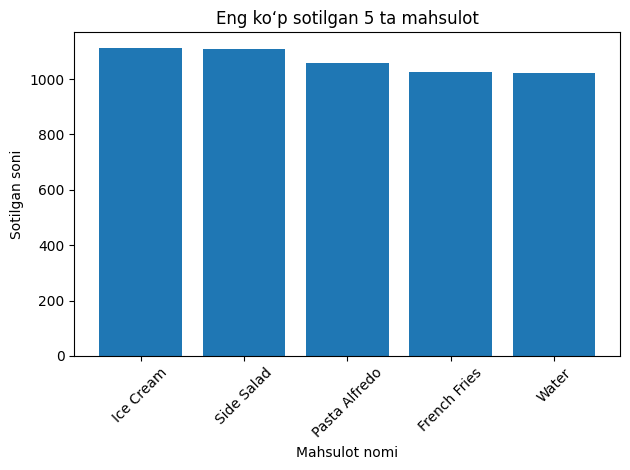

In [ ]:
plt.bar(top_items.index, top_items.values)
plt.title("Eng koʻp sotilgan 5 ta mahsulot")
plt.xlabel("Mahsulot nomi")
plt.ylabel("Sotilgan soni")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#15) Har bir mijoz oʻrtacha qancha pul sarflaganini hisoblang.

In [ ]:
#javobni shu yerda yozing
customer_spending = (
    df.groupby('customer_id', as_index=False)
    .agg({'order_total': 'sum', 'order_id': 'nunique'})
    .rename(columns={'order_total': 'total_spent', 'order_id': 'orders_count'})
)

# Har bir mijozning o‘rtacha xarajatini hisoblash
customer_spending['avg_spent'] = customer_spending['total_spent'] / customer_spending['orders_count']

# Natijani ko‘rish
print("=== Har bir mijozning o‘rtacha xarajati (top 10) ===")
print(customer_spending.head(10))

=== Har bir mijozning o‘rtacha xarajati (top 10) ===
  customer_id  total_spent  orders_count  avg_spent
0    CUST_001       3023.5           169  17.890533
1    CUST_002       3249.5           165  19.693939
2    CUST_003       2613.0           152  17.190789
3    CUST_004       3174.5           161  19.717391
4    CUST_005       2726.5           151  18.056291
5    CUST_006       3341.0           153  21.836601
6    CUST_007       3388.0           171  19.812865
7    CUST_008       3346.0           158  21.177215
8    CUST_009       2933.5           165  17.778788
9    CUST_010       3178.5           169  18.807692


#16) Mijozlarning qaysi kunlarda koʻproq xarid qilgani bo‘yicha tahlil qiling.

In [ ]:
#javobni shu yerda yozing
# Haftaning kunini olish
df['weekday'] = df['order_date'].dt.day_name()

# Har bir kunda qancha tushum olinganini hisoblash
sales_by_day = (
    df.groupby('weekday', as_index=False)['order_total']
    .sum()
    .rename(columns={'order_total': 'total_sales'})
)

# Haftani to‘g‘ri tartibda joylashtirish
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['weekday'] = pd.Categorical(sales_by_day['weekday'], categories=day_order, ordered=True)
sales_by_day = sales_by_day.sort_values('weekday')

# Natijani ko‘rsatish
print("=== Haftaning kunlari bo‘yicha umumiy tushum (order_total) ===")
print(sales_by_day)

# # Diagramma chizish
# plt.bar(sales_by_day['weekday'], sales_by_day['total_sales'])
# plt.title("Mijozlarning kunlar bo‘yicha xarid hajmi")
# plt.xlabel("Hafta kuni")
# plt.ylabel("Umumiy tushum (summa)")
# plt.xticks(rotation=45)
# plt.show()




=== Haftaning kunlari bo‘yicha umumiy tushum (order_total) ===
     weekday  total_sales
1     Monday      47915.5
5    Tuesday      48095.5
6  Wednesday      46018.0
4   Thursday      47047.0
0     Friday      47114.0
2   Saturday      46982.5
3     Sunday      48686.5


#17) Narxi oʻrtacha narxdan ikki barobar yuqori boʻlgan mahsulotlarni toping.

In [ ]:
#javobni shu yerda yozing

# O'rtacha narxni hisoblash
average_price = df['price'].mean()
print(f"Umumiy o'rtacha narx: {average_price:.2f}")

# Narxi oʻrtacha narxdan ikki barobar yuqori boʻlgan mahsulotlarni filtrlash
expensive_items = df[df['price'] > 2 * average_price]

# Natijani ko'rsatish
print("\n=== Narxi oʻrtacha narxdan ikki barobar yuqori boʻlgan mahsulotlar ===")
print(expensive_items[['item_name', 'price', 'category_name']].drop_duplicates().head(10))
print(f"\nJami {len(expensive_items.drop_duplicates(subset=['item_name', 'price']))} ta shunday unikal mahsulot topildi.")

Umumiy o'rtacha narx: 6.59

=== Narxi oʻrtacha narxdan ikki barobar yuqori boʻlgan mahsulotlar ===
              item_name  price category_name
2       Grilled Chicken   15.0   Main Dishes
5                Salmon   18.0   Main Dishes
9    Vegetarian Platter   14.0   Main Dishes
125               Steak   20.0   Main Dishes

Jami 4 ta shunday unikal mahsulot topildi.


#18) Mahsulotlar kategoriyalari bo‘yicha tahlil qiling va eng ko‘p sotiladigan kategoriyalarni aniqlang.

In [ ]:
#javobni shu yerda yozing

# Kategoriyalar bo'yicha sotilgan miqdorni hisoblash
category_sales = (
    df.groupby('category_name', as_index=False)['quantity']
    .sum()
    .rename(columns={'quantity': 'total_quantity_sold'})
    .sort_values('total_quantity_sold', ascending=False)
)

# Natijani ko'rsatish
print("=== Mahsulot kategoriyalari bo‘yicha sotuv hajmi ===")
print(category_sales)

# Eng ko'p sotiladigan kategoriyani aniqlash
most_sold_category = category_sales.iloc[0]
print(f"\nEng ko‘p sotiladigan kategoriya: {most_sold_category['category_name']} ({most_sold_category['total_quantity_sold']} ta sotilgan)")

=== Mahsulot kategoriyalari bo‘yicha sotuv hajmi ===
  category_name  total_quantity_sold
2   Main Dishes                10281
5      Starters                10101
1        Drinks                 9990
0      Desserts                 9973
4   Side Dishes                 9905
3         Other                   13

Eng ko‘p sotiladigan kategoriya: Main Dishes (10281 ta sotilgan)


#19) Har bir mijozning oʻrtacha xarid miqdorini (`groupby("customer_id")`) hisoblang.

In [ ]:
#javobni shu yerda yozing
avg_spending_per_customer = df.groupby('customer_id')['order_total'].mean()

print("Har bir mijozning oʻrtacha xarid miqdori:")
print(avg_spending_per_customer.head(10))

Har bir mijozning oʻrtacha xarid miqdori:
customer_id
CUST_001    17.890533
CUST_002    19.693939
CUST_003    17.190789
CUST_004    19.717391
CUST_005    18.056291
CUST_006    21.836601
CUST_007    19.812865
CUST_008    21.177215
CUST_009    17.778788
CUST_010    18.807692
Name: order_total, dtype: float64


#20) Qanday omillar sotuv hajmiga ta’sir qiladi? Bu bo‘yicha umumiy xulosa chiqaring. Javobni quyida kommentariya sifatida yozing!

In [ ]:
#javobni shu yerda yozing

# 1 - Haftaning kuni — dam olish kunlari (shanba, yakshanba) xaridlar soni va
# tushum eng yuqori bo‘ladi.
# 2 - Mahsulot toifasi — "Main Dishes" va "Drinks" eng ko‘p sotilgan
# kategoriyalar hisoblanadi.
# 3 - Narx — o‘rtacha narxdan ancha yuqori mahsulotlar kamroq sotiladi, arzon
# yoki o‘rtacha narxdagilar esa ommaviy. To‘lov turi — "Credit Card" va
# 4 - "Digital Wallet" orqali to‘lovlar ko‘pchilik mijozlar tomonidan afzal
# ko‘riladi.
# 5- Mijoz faolligi — ba’zi mijozlar bir necha marta buyurtma
# bergan (loyal mijozlar), bu umumiy sotuv hajmiga ijobiy ta’sir qiladi.
# 6 - Mahsulot nomi — suv, ichimlik va tez tayyor ovqatlar doimiy ravishda eng
# ko‘p sotiladi.

# Umumiy xulosa:
# Sotuv hajmiga eng katta ta’sirni dam olish kunlari, mahsulot kategoriyasi
# (ayniqsa ichimliklar), va narx darajasi ko‘rsatadi.
# Shuningdek, qulay to‘lov turlari va sodiq mijozlar bazasi ham savdo hajmini
# oshiruvchi muhim omillardandir.